In [2]:
import pandas as pd
import importnb
import import_ipynb
#from tkinter import *

from database_interaction import Nba_DB
from player_clustering import Clustering_Algorithm


In [69]:
#Class that handles the front end interaction with user's inputs
class UserExperience:
    db_conn = None
    season = ''
    columns = ''
    queried_data = pd.DataFrame()
    team = ()
    team_data = pd.DataFrame()
    
    #Constructor
    def __init__(self):
        self.db_conn = Nba_DB()
        
    #Start the program    
    def startup(self):
        #Create a list of available seasons to select from
        print('Welcome to the interactive NBA Player clustering program. Please select which NBA season you would like to look at from the following list.')
        
        #Get season and columns input
        self.season = self.get_season()
        self.columns = self.get_columns()
        
        #Get dataset
        self.get_data()
        
        #Run the clustering algorithm
        cluster = Clustering_Algorithm(self.queried_data, 25)
        cluster.start_data_prep()
        self.queried_data = cluster.get_queried_data()
        
        #Get which team the users wants to look at
        self.team = self.get_team()
        
        #Create dataframe for the selected team
        self.show_team()
        
        #Return players within the same cluster
        self.replace_player()
        
        #Close out connection
        self.db_conn.close_connection()
        
    #Return the season that the user would like to include as features
    def get_season(self):
        seasons = self.db_conn.execute_query("SELECT DISTINCT season FROM players ORDER BY season")
        print(list(seasons['season']))
        season_input = input("Season Selected: ")
        
        #Check that the user input is a valid season
        if season_input not in seasons['season'].unique():
            print('Not an actual season, try again')
            return self.get_season()
        else:
            return season_input
        
    #Have the user select what team and then what player they would like to replace    
    def get_team(self):
        teams = self.db_conn.execute_query("SELECT DISTINCT team_id, team_name FROM teams WHERE season = '" + self.season + "'")
        print(teams)
        
        #Create a tuple with the selected teams id and name
        user_input = input("Team Selected: ")
        if user_input not in teams['team_name'].unique():
            print('Not an actual team, try again')
            return self.get_team()
        else:
            team_input = teams[teams['team_name'] == user_input].to_records(index = False)[0]
            return team_input
        
        
    
    #Return the columns that the user would like to include as features    
    def get_columns(self):
        available_columns = self.db_conn.execute_query("SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'players'")
        print(list(available_columns['column_name']))
        
        columns = input('Select columns that you want to use in clustering algorithm. (Please use the following format: x, y, z)')
        
        #Add validator to check if column names are valid
        
        return columns
    
    #Run a query with the season and columns objects to return the dataset to be sent to the clustering algorithm
    def get_data(self):
        query = "SELECT " + self.columns + " FROM players where SEASON = '" + self.season + "'"
        #print(query)
        self.queried_data = self.db_conn.execute_query(query)
        
        #Display sample of queried data
        #display(self.queried_data.head())
    
    #Create a Dataframe for the team the user wants to look at
    def show_team(self):
        query = "SELECT player_name, team_abbreviation, position, salary FROM players where SEASON = '" + self.season + "' AND team_id = " + str(self.team[0])
        self.team_data = self.db_conn.execute_query(query)

        print(self.team_data)
    
    #Return players within the same cluster
    def replace_player(self):
        player = input('Select Player to replace')
        cluster = self.queried_data.loc[self.queried_data['player_name'] == player, 'cluster'].values[0]
        players_in_cluster = self.queried_data.loc[self.queried_data['cluster'] == cluster, ['player_name', 'position', 'cluster', 'fg3_pct', 'fg3a_frequency', 'fg2_pct', 'fg2a_frequency']]
        display(players_in_cluster)
        

successfully connected
Welcome to the interactive NBA Player clustering program. Please select which NBA season you would like to look at from the following list.
['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']


Season Selected:  2016-17


['fg3m', 'player_id', 'corner_3_fgm', 'corner_3_fga', 'corner_3_fg_pct', 'salary', 'team_id', 'age', 'gp', 'w', 'l', 'w_pct', 'min', 'e_off_rating', 'off_rating', 'sp_work_off_rating', 'e_def_rating', 'def_rating', 'sp_work_def_rating', 'e_net_rating', 'net_rating', 'sp_work_net_rating', 'ast_pct', 'ast_to', 'ast_ratio', 'oreb_pct', 'dreb_pct', 'reb_pct', 'tm_tov_pct', 'e_tov_pct', 'efg_pct', 'ts_pct', 'usg_pct', 'e_usg_pct', 'e_pace', 'pace', 'pace_per40', 'sp_work_pace', 'pie', 'poss', 'fgm', 'fga', 'fgm_pg', 'fga_pg', 'fg_pct', 'gp_rank', 'w_rank', 'l_rank', 'w_pct_rank', 'min_rank', 'e_off_rating_rank', 'off_rating_rank', 'sp_work_off_rating_rank', 'e_def_rating_rank', 'def_rating_rank', 'sp_work_def_rating_rank', 'e_net_rating_rank', 'net_rating_rank', 'sp_work_net_rating_rank', 'ast_pct_rank', 'ast_to_rank', 'ast_ratio_rank', 'oreb_pct_rank', 'dreb_pct_rank', 'reb_pct_rank', 'tm_tov_pct_rank', 'e_tov_pct_rank', 'efg_pct_rank', 'ts_pct_rank', 'usg_pct_rank', 'e_usg_pct_rank', 'e_p

Select columns that you want to use in clustering algorithm. (Please use the following format: x, y, z) player_name, e_def_rating, pie, e_off_rating, ast_to, e_pace, e_usg_pct, position, ts_pct, fg2a, fg2_pct, fg3a, fg3_pct, in_the_paint_non_ra_fga ,in_the_paint_non_ra_fg_pct, corner_3_fga, corner_3_fg_pct, fg3a_frequency, fg2a_frequency, gp


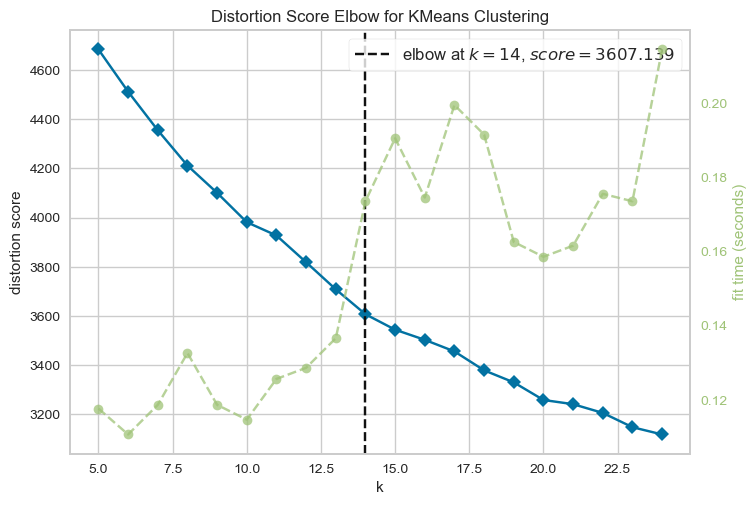

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
5.0,0.135846,77.486544,2.010234
6.0,0.118108,67.640879,2.126323
7.0,0.110180,60.247647,2.121186
8.0,0.095058,55.557109,2.164344
9.0,0.105420,51.636249,2.115528
10.0,0.097705,48.360816,2.055271
11.0,0.098970,46.052043,2.035438
12.0,0.097703,43.250338,2.038210
13.0,0.093630,41.714646,1.913001


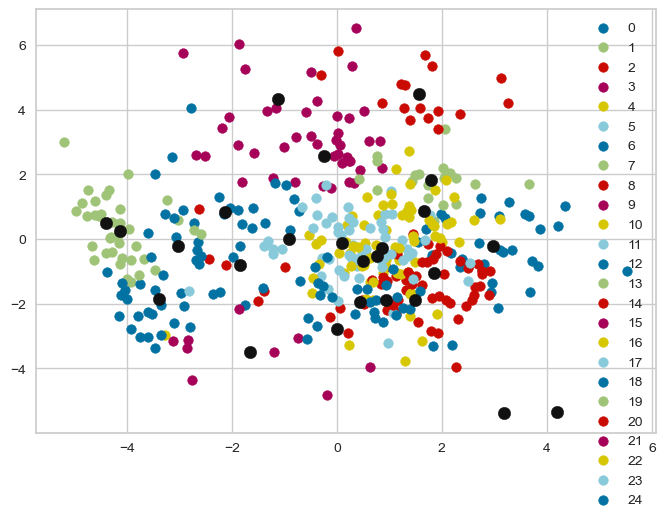

player_clustering.ipynb:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "    #Run sillhouete average scoring to find optimal number of clusters\n",


       team_id               team_name
0   1610612748              miami heat
1   1610612744   golden state warriors
2   1610612738          boston celtics
3   1610612743          denver nuggets
4   1610612764      washington wizards
5   1610612754          indiana pacers
6   1610612752         new york knicks
7   1610612756            phoenix suns
8   1610612742        dallas mavericks
9   1610612766       charlotte hornets
10  1610612745         houston rockets
11  1610612741           chicago bulls
12  1610612758        sacramento kings
13  1610612755      philadelphia 76ers
14  1610612765         detroit pistons
15  1610612751           brooklyn nets
16  1610612750  minnesota timberwolves
17  1610612746             la clippers
18  1610612761         toronto raptors
19  1610612740    new orleans pelicans
20  1610612760   oklahoma city thunder
21  1610612763       memphis grizzlies
22  1610612762               utah jazz
23  1610612759       san antonio spurs
24  1610612757  portland 

Team Selected:  atlanta hawks


         player_name team_abbreviation position      salary
0    deandre' bembry               atl       SG   1499760.0
1    dennis schroder               atl       PG   2708582.0
2      dwight howard               atl        C  23180275.0
3     ersan ilyasova               atl  unknown         0.0
4          gary neal               atl  unknown         0.0
5      jose calderon               atl  unknown         0.0
6      kent bazemore               atl       SG  15730338.0
7     kris humphries               atl       PF   4000000.0
8    lamar patterson               atl       SG    246956.0
9    malcolm delaney               atl        G   2500000.0
10     mike dunleavy               atl  unknown         0.0
11      mike muscala               atl       PF   1015696.0
12        mike scott               atl       PF   3333334.0
13      paul millsap               atl       PF  20072033.0
14        ryan kelly               atl       PF    286785.0
15    taurean prince               atl  

Select Player to replace dwight howard


,player_name,position,cluster,fg3_pct,fg3a_frequency,fg2_pct,fg2a_frequency
43,boban marjanovic,C,13,0.000,0.000,0.592,1.000
49,brandan wright,F,13,0.000,0.008,0.675,0.992
78,clint capela,C,13,0.000,0.000,0.718,1.000
79,cody zeller,C,13,0.000,0.003,0.654,0.997
101,david lee,PF,13,0.000,0.000,0.653,1.000
105,deandre jordan,C,13,0.000,0.004,0.745,0.996
123,dewayne dedmon,C,13,0.000,0.000,0.690,1.000
134,dwight howard,C,13,0.000,0.004,0.680,0.996
184,javale mcgee,C,13,0.000,0.010,0.691,0.990
341,montrezl harrell,PF,13,0.143,0.023,0.749,0.977


connection closed


In [70]:
#quick input: player_name, e_def_rating, pie, e_off_rating, ast_to, e_pace, e_usg_pct, position, ts_pct, fg2a, fg2_pct, fg3a, fg3_pct, in_the_paint_non_ra_fga ,in_the_paint_non_ra_fg_pct, corner_3_fga, corner_3_fg_pct, fg3a_frequency, fg2a_frequency, gp
user_ex = UserExperience()
user_ex.startup()

In [5]:
user_ex.queried_data.loc[user_ex.queried_data['cluster'] == 12, ['player_name', 'position', 'cluster', 'fg3_pct', 'fg3a_frequency', 'fg2_pct', 'fg2a_frequency']]

,player_name,position,cluster,fg3_pct,fg3a_frequency,fg2_pct,fg2a_frequency
7,alex abrines,G,12,0.323,0.809,0.500,0.191
27,anthony tolliver,PF,12,0.377,0.830,0.409,0.170
34,ben mclemore,SF,12,0.415,0.641,0.348,0.359
57,cj miles,unknown,12,0.330,0.657,0.425,0.343
83,d.j. wilson,PF,12,0.362,0.510,0.467,0.490
98,darius miller,SF,12,0.365,0.752,0.467,0.248
161,ersan ilyasova,PF,12,0.363,0.419,0.491,0.581
164,frank jackson,PG,12,0.312,0.379,0.507,0.621
193,ian clark,G,12,0.327,0.527,0.470,0.473
196,iman shumpert,unknown,12,0.348,0.612,0.416,0.388
